# Importing the libraries requied for Stock Prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

# Reading Netflix Stock price dataset

In [34]:
# Load Netflix data
netflix = pd.read_csv('NFLX.csv')
netflix.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
5,2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400


# Dataset evaluation

In [3]:
# Number of trading days
netflix.shape

(5044, 7)

In [4]:
# Dataset evaluation
netflix.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2002-05-23    1.156429    1.242857    1.145714    1.196429    1.196429   
1     2002-05-24    1.214286    1.225000    1.197143    1.210000    1.210000   
2     2002-05-28    1.213571    1.232143    1.157143    1.157143    1.157143   
3     2002-05-29    1.164286    1.164286    1.085714    1.103571    1.103571   
4     2002-05-30    1.107857    1.107857    1.071429    1.071429    1.071429   
...          ...         ...         ...         ...         ...         ...   
5039  2022-05-27  193.190002  195.250000  190.369995  195.190002  195.190002   
5040  2022-05-31  196.179993  199.949997  190.800003  197.440002  197.440002   
5041  2022-06-01  198.699997  202.740005  191.660004  192.910004  192.910004   
5042  2022-06-02  192.020004  205.470001  191.720001  205.089996  205.089996   
5043  2022-06-03  200.139999  202.949997  198.050003  198.979996  198.979996   

       

In [5]:
netflix.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


# Checking for Null values

In [6]:
# Checking NaN values
netflix.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5039,False,False,False,False,False,False,False
5040,False,False,False,False,False,False,False
5041,False,False,False,False,False,False,False
5042,False,False,False,False,False,False,False


In [7]:
netflix.isnull().sum().sum()

0

# Data exploration

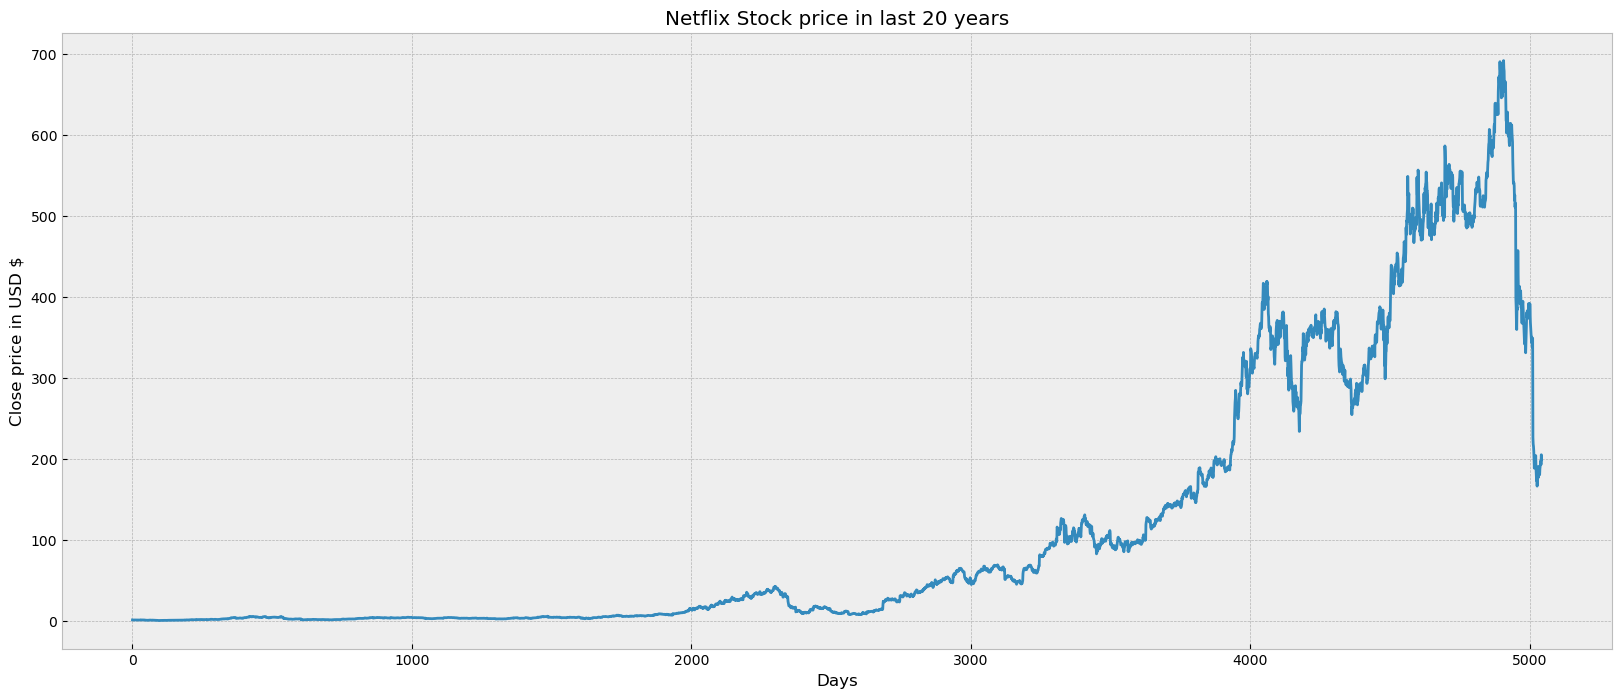

In [15]:
# Visualize the Adj Close data
plt.figure(figsize=(20,8))
plt.title('Netflix Stock price in last 20 years')
plt.xlabel('Days')
plt.ylabel('Close price in USD $') 
plt.plot(netflix['Adj Close'])
plt.show()         

In [16]:
# getting the Adj close price
netflix = netflix[['Adj Close']]
netflix.head(4)

,Adj Close
0,1.196429
1,1.210000
2,1.157143
3,1.103571


# Stock prediction for Netflix dataset

In [17]:
# created a variable to predict x days in future
future_days = 30
# added a new column (target) shifted 'x' units/days up
netflix['Prediction'] = netflix[['Adj Close']].shift(-future_days)
netflix.head(4)

,Adj Close,Prediction
0,1.196429,1.175714
1,1.210000,1.160714
2,1.157143,1.163571
3,1.103571,1.269286


In [18]:
# create the feature data set x and convert numpy array and remove the last x rows or days
X = np.array(netflix.drop(['Prediction'], axis = 1))[:-future_days]
print(X)

[[  1.196429]
 [  1.21    ]
 [  1.157143]
 ...
 [348.609985]
 [226.190002]
 [218.220001]]


In [19]:
# create the target data set y convert to numpy array and all target values except the last rows
y = np.array(netflix['Prediction'])[:-future_days]
print(y)

[  1.175714   1.160714   1.163571 ... 192.910004 205.089996 198.979996]


In [20]:
# lets split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [21]:
# create the model
# create decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
# create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [23]:
# get the last x rows of the future data set
x_future = netflix.drop(['Prediction'], axis = 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[356.769989],
       [340.320007],
       [331.01001 ],
       [343.75    ],
       [357.529999],
       [371.399994],
       [380.600006],
       [374.589996],
       [382.920013],
       [374.48999 ],
       [375.709991],
       [373.850006],
       [378.51001 ],
       [391.820007],
       [381.470001],
       [374.589996],
       [373.470001],
       [391.5     ],
       [380.149994],
       [368.350006],
       [362.149994],
       [355.880005],
       [348.      ],
       [344.100006],
       [350.429993],
       [341.130005],
       [337.859985],
       [348.609985],
       [226.190002],
       [218.220001]])

In [24]:
# Show model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# Show model linear regression
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[366.959991 358.820007 198.399994 188.539993 199.520004 436.25
 302.799988 193.754997 204.009995 188.320007 180.970001 173.100006
 357.119995 334.959991 174.309998 193.754997 186.509995 190.559998
 362.98999  183.479996 186.350006 187.440002 180.339996 187.830002
 191.399994 195.190002 197.440002 192.910004 205.089996 198.979996]

[353.52067497 337.35583734 328.20722004 340.72637476 354.26751094
 367.89708312 376.9376219  371.03178955 379.21741384 370.93351706
 372.13237053 370.30462656 374.88385394 387.96313514 377.79253639
 371.03178955 369.93120857 387.64867515 376.49541042 364.89996368
 358.80742284 352.64611797 344.90270516 341.07031375 347.2905766
 338.15179481 334.93845741 345.50211666 225.20416449 217.37231567]


# Visualization

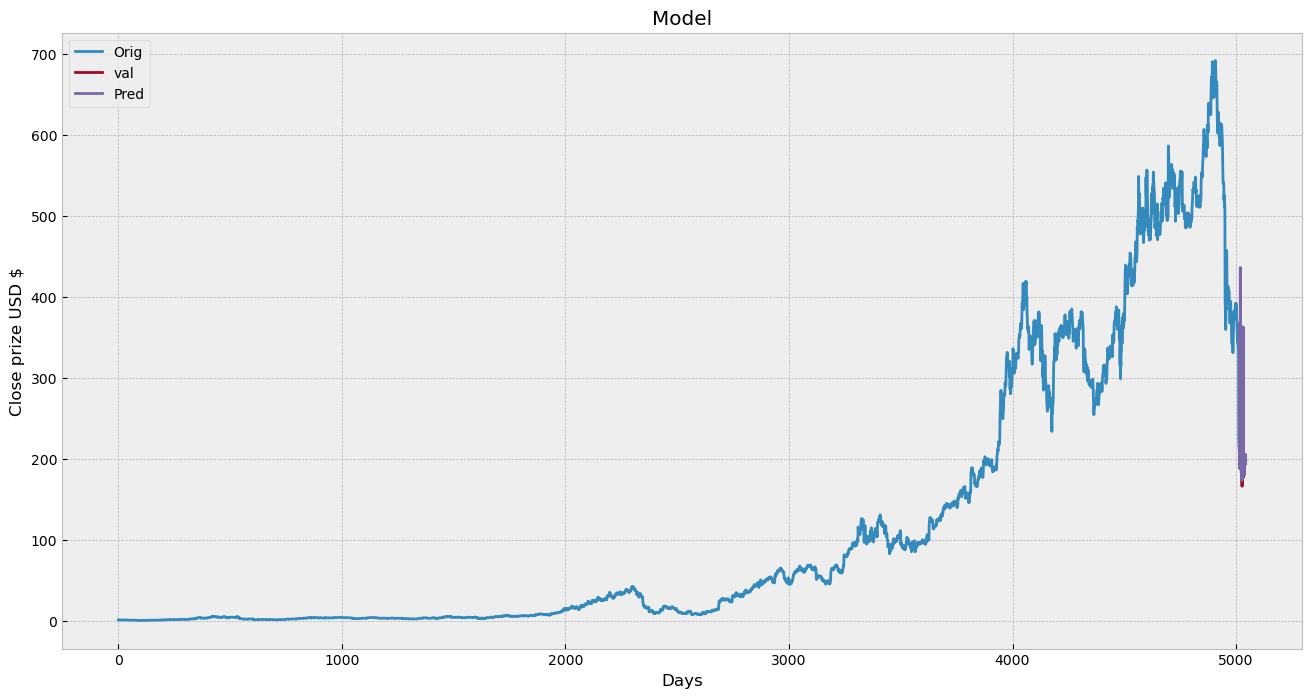

In [30]:
# Visualize the data
predictions = tree_prediction

valid = netflix[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close prize USD $')
plt.plot(netflix['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Orig', 'val', 'Pred'])
plt.show()

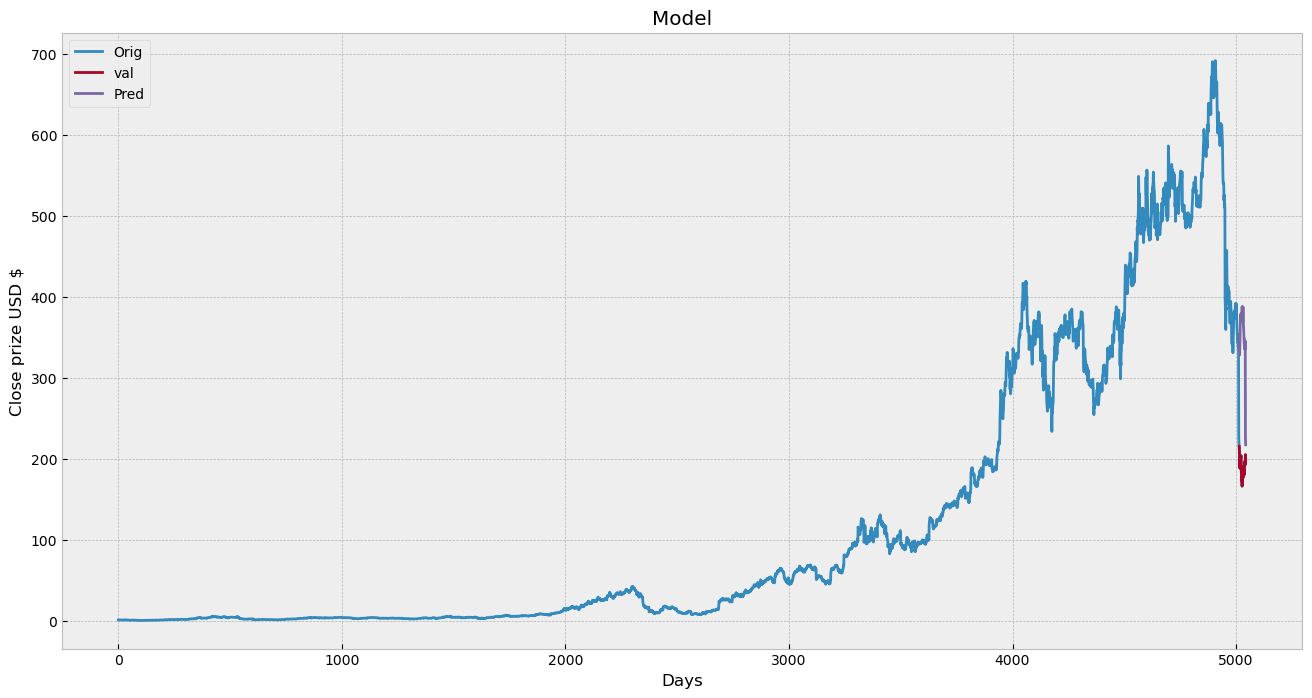

In [31]:
# Visualize the data
predictions = lr_prediction

valid = netflix[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close prize USD $')
plt.plot(netflix['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Orig', 'val', 'Pred'])
plt.show()

# Conclusion

Following are the conclusions:

A grudual increase in the Netflix Stock price is observed in the last 20 years between (2002 to 2022).

There are some episodes of decrease in stock prices for adjacent close.

A sudden drop in stock prices in 2019 is observed.

The tree prediction model is showing better prediction compare to linear regression.


# Future Development

To explore other attributes of the Netflix Stock price data.